# Linear Regression

When we want to predict the continuous values, for example: We need to predict the salary based on experience, Car price based on the condition of the car and so on...

When there is one X and Y, for example X = Experience and Y = Salary, then it is known as Simple Linear Regression 

When there are more X's and Y, for example X = Experience, Age, Education... and Y = Salary, then it is known as Multiple Linear Regression

**Assumptions of Linear Regression**

    1) Linearity - The data should be linear in nature, that means if we want to predict the salary using experience than you salary and experience should have a relationship i.e. if experience is increasing the salary is increasing or vice versa. If linearity is there the predictions will much better as compare to for non linear data. When the data is scattered or non linear that leads to more errors. We have create a line which passes from majority of the points, so that there will less errors. 
       
       How to check the linearity: We can create the charts and based on that we can find out.
       If Linearity not there: We can tell business that if we are applying linear regression, the accuracy will be less. OR we can apply some other model. 
    
    2) No Heteroskedasticity (No Outliers) - There should not be any outliers, as it will lead to wrong predictions. If there is any outliers we can remove that. If business needs that we can transform the data. The popular transformation is Log Transformation.
    
     How to check the heteroskedasticity: We can create the charts and based on that we can find out.
     If heteroskedasticity is there: We can remove the outliers or we can transform the outliers. (Log transformation) 
    
    3) No Multicolinearity - Consider we are predicting Salary based on Experience and Age. As the experience is increasing salary is increasing, as the age is increasing salary is increasing. But we see one more relation that as the age increasing the experience is also increasing. Here independent variables are having correlation. This we don't want. This makes the model unstable. It will change the coefficients arbitrary. 
    
    How to check the multicolinearity: We can create a pairplot or heatmap and check the karl pearson correlation coefficients. Or we can check the Variance Inflation Factor (VIF), as per the industry standards the value of VIF should be less than 5. The formula for VIF is **VIF = 1/(1-R^2)**  
    
    We will create a model on the independent variables, for example: We will create a model between Experience and Age, and we will get the R^2, let's assume R^2 = 0.8. VIF = 5. That means there is a multicolinearity
    
    If Multicolinearity is there: We can remove one of the variables. For example: If we want to predict the salary based on Experience and Age, then we can remove the age from the model. 
    
    
**Line always pass from the average**

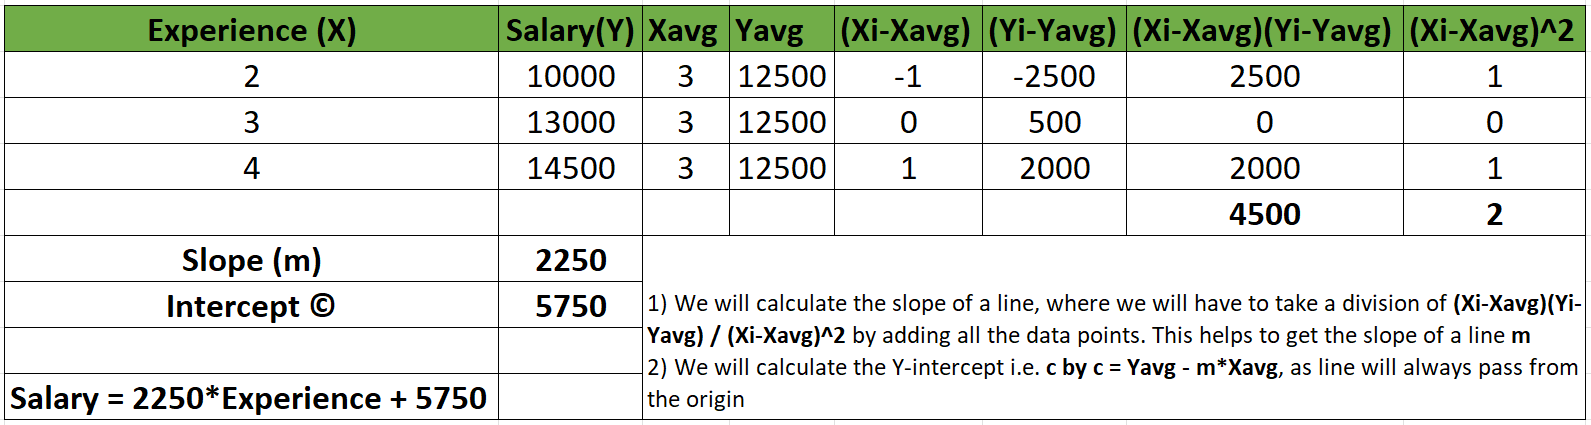

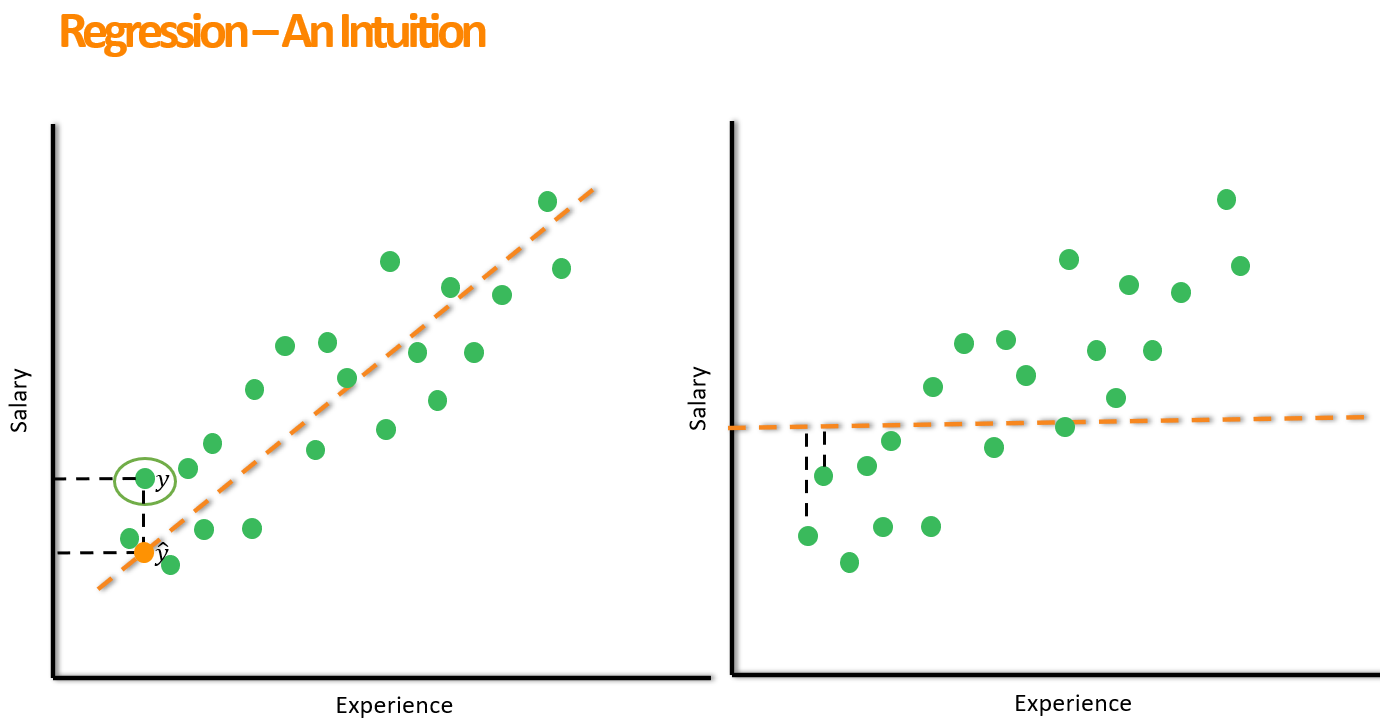

**Average line will always gives the maximum errors, as shown above**

**SST - The sum of squared errors coming from the average line, this number is the maximum error square, we cannot have error more than this. We will preserve this number** 

No matter how the data is you SST will always be higher

**SSE - The sum if squared errors coming from the predicted line, in our example it is Salary  = 2250*Experience + 5750**

SSE will be lesser if you data is linear in nature, however, SSE will be higher when the data is scattered in nature. Ideally SSE should be a lesser number. 

**Coefficient of Determination R^2**

R^2 = 1 - (SSE/SST)

Scenario 1: When your SSE is 0 or lesser then the R^2 value will be more towards 1, that is good. 
    
Scenario 2: When you SSE is equal to SST or almost equal to SST then the R^2 value will be more towards 0, that is bad. 
    
R^2 varies from 0 to 1 and if it more towards 0 worst the model is and when it is more towards 1 best the model is


**R^2 has a tendency to increase always, if you are adding an important variable or unimportant variable, R^2 will always increase**

**Experience| Education| Team Size| Son's Age| Salary**

Salary = m1**Experience + c | R^2: 0.8

Salary = m1**Experience + m2**Education + c | R^2: 0.82

Salary = m1**Experience + m2**Education + m3**Team Size + c | R^2: 0.85

Salary = m1**Experience + m2**Education + m3**Team Size + m4**Son's Age + c | R^2: 0.9


**Adjusted R^2** - It has a penalizing factor, if you are adding a variable its important or not important, it will always penalize.

**Adjusted R^2: 1 - (1-R^2)*((n-1)/(n-k+1))**

n: Total number of training records 
k: Total number of features (Penalizing factor)
So when K is increasing the value of Adjusted R^2 will decrease. 

**How to check the accuracy of the model**

**R^2 Value:** For simple linear regression we can go with R^2 

**Adjusted R^2 Value:** For multiple linear regression we can go with Adjusted R^2 

**Mean Absolute Error (MAE):** - As it is an  error it should be less 

**Mean Absolute Percentage Error (MAPE):** - As it is an  error it should be less

**Mean Squared Error (MSE):** - As it is an  error it should be less

**Root Mean Squared Error (RMSE):** - As it is an  error it should be less

# Simplie Linear Regression - Salary based on Experience

In [1]:
import os 
os.chdir(r'E:\D\Edureka\Jun 1 - Edureka - Python\Class 7 - Codes')

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns

C:\Users\rahul\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
dataset_salary = pd.read_csv('Salary_Data.csv')

In [6]:
dataset_salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


**Exploratory Data Analysis**

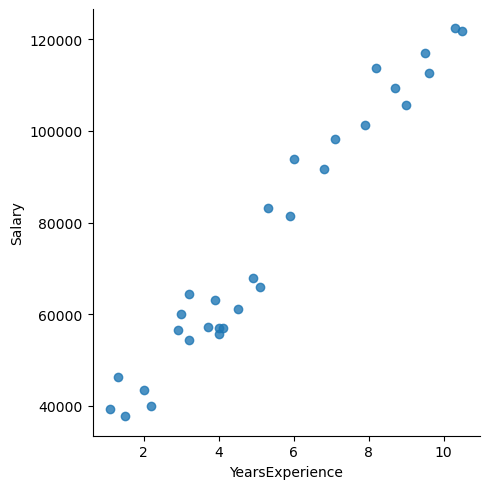

In [7]:
sns.lmplot(data=dataset_salary, x='YearsExperience', y='Salary',fit_reg=False)

**The data is linear and there is no outliers**

**Split the data into X and y**

In [11]:
X = dataset_salary.iloc[:,0:1].values

In [14]:
y = dataset_salary.iloc[:,-1].values

**Split the data into Train and Test, this split will be a random split, random state makes the same split in any machine, or in any instance**

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

**Create the model - Linear Regression (SKLEARN)**

In [50]:
from sklearn.linear_model import LinearRegression
regressor_sklearn = LinearRegression()
regressor_sklearn.fit(x_train,y_train)

LinearRegression()

In [51]:
regressor_sklearn.coef_

array([9602.56221394])

In [52]:
regressor_sklearn.intercept_

25235.616316676256

**salary = 9602.56 * Experience + 25235.62**

**Test the model**

In [55]:
y_pred = regressor_sklearn.predict(x_test)

In [54]:
y_test

array([ 54445., 121872.,  56642., 116969.,  64445., 112635.,  56957.,
        98273.,  55794.])

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.963407053878536

**Prediction for the new employees - How much salary we can give**

In [59]:
x_new = pd.read_clipboard().drop(['of','exp'],axis=1)

In [64]:
regressor_sklearn.predict(x_new.iloc[:,0:1].values)

array([150068.92509796, 159671.48731191, 169274.04952585, 178876.6117398 ,
        25235.61631668])

**Create the model - Linear Regression (Statsmodel)**

In [69]:
x_train_sm = x_train.copy()

In [70]:
x_test_sm = x_test.copy()

In [71]:
x_train_sm = np.append(arr=x_train_sm, values=np.ones((21,1)).astype(int),axis=1)

In [72]:
x_test_sm = np.append(arr=x_test_sm, values=np.ones((9,1)).astype(int),axis=1)

In [74]:
pd.DataFrame(x_test_sm)

,0,1
0,3.2,1.0
1,10.5,1.0
2,2.9,1.0
3,9.5,1.0
4,3.2,1.0
5,9.6,1.0
6,4.0,1.0
7,7.1,1.0
8,4.0,1.0


In [65]:
import statsmodels.api as sm

In [75]:
regressor_statsmodels = sm.OLS(endog=y_train,exog=x_train_sm).fit()

In [76]:
regressor_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     375.8
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           5.62e-14
Time:                        12:09:01   Log-Likelihood:                -211.50
No. Observations:                  21   AIC:                             427.0
Df Residuals:                      19   BIC:                             429.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          9602.5622    495.377     19.384      0.000    8565.726    1.06e+04
const       2.524e+04   2811.727      8.975      0.000    1.94e+04    3.11e+04
==============================================================================
Omnibus:                        1.525   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                1.206
Skew:                           0.389   Prob(JB):                        0.547
Kurtosis:                       2.121   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
y_pred_sm = regressor_statsmodels.predict(x_test_sm)

In [79]:
r2_score(y_test,y_pred_sm)

0.963407053878536

# Multiple Linear Regression - Predict the Profit based on multiple features

In [80]:
dataset_profit = pd.read_csv('50_Startups.csv')

In [81]:
dataset_profit

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Exploratory Data Analysis

In [84]:
sns.pairplot(dataset_profit)

In [85]:
sns.barplot(data=dataset_profit,x='State',y='Profit')

<AxesSubplot:xlabel='State', ylabel='Profit'>

**Split the data into X and y**

In [121]:
X = dataset_profit.iloc[:,0:4]

In [122]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [93]:
y = dataset_profit.iloc[:,-1].values

In [94]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

**One Hot Encoding on the State column**

In [98]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

In [99]:
state_encoded = onehot_encoder.fit_transform(dataset_profit[['State']])
state_columns = onehot_encoder.get_feature_names(['State'])

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [102]:
df_state_encoded = pd.DataFrame(state_encoded,columns=state_columns)

**Removing one of the states from the data so that there will not be any dummy variable trap or We will not have any multicolinearity**

In [119]:
df_state_encoded.drop('State_California',axis=1,inplace=True)

In [123]:
X = pd.concat([X,df_state_encoded],axis=1)

In [124]:
X.drop('State',axis=1,inplace=True)

In [125]:
X = X.values

In [126]:
X

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.2333488e+05, 1.0867917e+05, 3.0498162e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.0191308e+05, 1.1059411e+05, 2.2916095e+05, 1.0000000e+00,
        0.00

In [127]:
pd.DataFrame(X)

,0,1,2,3,4
0,165349.20,136897.80,471784.10,0.0,1.0
1,162597.70,151377.59,443898.53,0.0,0.0
2,153441.51,101145.55,407934.54,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,1.0
4,142107.34,91391.77,366168.42,1.0,0.0
5,131876.90,99814.71,362861.36,0.0,1.0
6,134615.46,147198.87,127716.82,0.0,0.0
7,130298.13,145530.06,323876.68,1.0,0.0
8,120542.52,148718.95,311613.29,0.0,1.0
9,123334.88,108679.17,304981.62,0.0,0.0


**Split the data into train and test**

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=123)

**Create a model - SKLEARN**

In [136]:
from sklearn.linear_model import LinearRegression
regressor_sklearn_pro = LinearRegression()
regressor_sklearn_pro.fit(x_train,y_train)

LinearRegression()

In [137]:
regressor_sklearn_pro.coef_

array([ 7.56806466e-01,  1.60326273e-02,  4.46260113e-02, -5.41584950e+02,
        2.58501060e+03])

In [131]:
regressor_sklearn_pro.intercept_

43783.08288881878

**https://www.algosome.com/articles/dummy-variable-trap-regression.html**

**Do the prediction on the test**

In [139]:
y_pred_pro = regressor_sklearn_pro.predict(x_test)

In [140]:
r2_score(y_test,y_pred_pro)

0.9630682059434349

**Create the model - Linear Regression (Statsmodel)**

In [141]:
x_train_sm_p = x_train.copy()

In [142]:
x_test_sm_p = x_test.copy()

In [143]:
len(x_train_sm_p)

35

In [144]:
len(x_test_sm_p)

15

In [145]:
x_train_sm_p = np.append(arr=x_train_sm_p, values=np.ones((35,1)).astype(int),axis=1)

In [146]:
x_test_sm_p = np.append(arr=x_test_sm_p, values=np.ones((15,1)).astype(int),axis=1)

In [147]:
import statsmodels.api as sm

In [148]:
regressor_statsmodels_pro = sm.OLS(endog=y_train,exog=x_train_sm_p).fit()

In [149]:
regressor_statsmodels_pro.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     92.05
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           6.95e-17
Time:                        13:39:00   Log-Likelihood:                -370.57
No. Observations:                  35   AIC:                             753.1
Df Residuals:                      29   BIC:                             762.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7568      0.065     11.702      0.000       0.625       0.889
x2             0.0160      0.068      0.236      0.815      -0.123       0.155
x3             0.0446      0.024      1.879      0.070      -0.004       0.093
x4          -541.5849   4621.980     -0.117      0.908   -9994.596    8911.426
x5          2585.0106   4265.747      0.606      0.549   -6139.422    1.13e+04
const       4.378e+04   9101.042      4.811      0.000    2.52e+04    6.24e+04
==============================================================================
Omnibus:                       13.560   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.088
Skew:                          -1.162   Prob(JB):                     0.000529
Kurtosis:                       5.224   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [151]:
y_pred_sm_p = regressor_statsmodels_pro.predict(x_test_sm_p)

In [152]:
r2_score(y_test,y_pred_sm_p)

0.9630682059417669

**Predicting the profit for new record**

In [154]:
x_new = pd.read_clipboard()

In [157]:
regressor_sklearn_pro.predict(x_new.values)

array([194754.11125523])

In [159]:
x_new = np.append(arr=x_new, values=np.ones((1,1)).astype(int),axis=1)

In [161]:
regressor_statsmodels_pro.predict(x_new)

array([194754.11125469])

**Use only Administration Spent to check the model - The purpose if the show how the value of R^2, P-Value and F-Statistic P value changes**

In [170]:
x_sm_as = X[:,1:2]

In [172]:
x_sm_as = np.append(arr=x_sm_as, values=np.ones((50,1)).astype(int),axis=1)

In [177]:
x_train_sm_as, x_test_sm_as,y_train, y_test = train_test_split(x_sm_as,y, test_size=0.30,random_state=123)

In [179]:
len(x_train_sm_as)

35

In [180]:
len(y_train)

35

**Create the model**

In [181]:
regressor_statsmodels_pro_as = sm.OLS(endog=y_train,exog=x_train_sm_as).fit()

In [182]:
regressor_statsmodels_pro_as.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2.090
Date:                Tue, 18 Jul 2023   Prob (F-statistic):              0.158
Time:                        13:50:36   Log-Likelihood:                -418.94
No. Observations:                  35   AIC:                             841.9
Df Residuals:                      33   BIC:                             845.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3177      0.220      1.446      0.158      -0.129       0.765
const       2.386e+04   9119.168      2.617      0.013    5310.664    4.24e+04
x2          2.386e+04   9119.168      2.617      0.013    5310.664    4.24e+04
x3          2.386e+04   9119.168      2.617      0.013    5310.664    4.24e+04
==============================================================================
Omnibus:                        1.293   Durbin-Watson:                   2.344
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                0.531
Skew:                           0.261   Prob(JB):                        0.767
Kurtosis:                       3.303   Cond. No.                     5.07e+36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.11e-62. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [183]:
pd.DataFrame(x_test_sm_as)

,0,1,2,3
0,110594.11,1.0,1.0,1.0
1,135495.07,1.0,1.0,1.0
2,115641.28,1.0,1.0,1.0
3,115816.21,1.0,1.0,1.0
4,114175.79,1.0,1.0,1.0
5,136897.80,1.0,1.0,1.0
6,118546.05,1.0,1.0,1.0
7,127320.38,1.0,1.0,1.0
8,153032.06,1.0,1.0,1.0
9,148718.95,1.0,1.0,1.0
